# Kolokwium

Na podstawie odczytów z radarów należy zaimplementować klasyfikator, który będzie w stanie rozpoznać obiekt poruszający się po trasie w zasięgu 10 km.

### Zbiór danych

Dany jest zbiór danych odczytów z ośmiu radarów umieszczonych na antenach sieci komórkowej (pierwsze 8 kolumn) oraz klasa obiektu (ostatnia kolumna). Wyróżnić można cztery klasy obiektów:
- człowiek,
- pojazd pancerny,
- lekki pojazd (np. samochod osobowy),
- autonomiczny robot bojowy.


### Zadanie

#### 1) Wczytaj dane z pliku `dane.npz`. Plik ten zawiera wspomniany zbiór danych.

Podziel dane na dwie części zachowując kolejność:
* dane treningowe (pierwsza połowa zbioru),
* dane testowe (druga połowa zbioru).

#### 2) Przeprowadź wstępną analizę danych.

* A) Odpowiedz na pytanie: Czy dane należy znormalizować?
* B) Odpowiedz na pytanie: Czy zbiór danych jest zbalansowany? Uzasadnij.

#### 3) W zależności od potrzeby przeprowadz normalizację i selekcję cech (wybierz tylko te cechy, które wpływają pozytywnie na wynik klasyfikatora).

#### 4) Wykonaj klasyfikację klasyfikatorem kNN, znajdź optymalne $k$, podaj wynik `accuracy`.

#### 5) Opisz wynik klasyfikatora.
    Wyświetl tablicę pomyłek (dane powinny być opisane czytelnie), opisz tablicę pomyłek, co zaobserwowałeś?

#### 6) Napisz wnioski

> UWAGA: Powinienś starać się uzyskać jak najlepszy wynik klasyfikatora.


### Przydatne kody:

#### Wczytanie danych:
```python
import numpy as np
with open('./dane.npz', 'rb') as f:
    content = np.load(f)
    columns, data = content['columns'], content['data']
```

#### Przykład uruchomienia klasyfikatora:
```python
from sklearn.neighbors import KNeighborsClassifier
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
```

#### Przykład uruchomienia selekcji:
```python
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
SelectKBest(k=20).fit_transform(X, y)
```

#### Przykład wyświetlenia wykresu:
```python
import matplotlib.pyplot as plt
plt.figure()
plt.title('wykres')
plt.xlabel('os x')
plt.ylabel('os y')
plt.scatter([1, 2, 3, 4, 5], [3, 2, 3, 4, 4], label='etykieta')
plt.legend()
```

#### Przykład użycia biblioteki scikit-learn do utworzenia tablicy pomyłek:
```python
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
```

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

sns.set_style("dark")

In [170]:
with open('./dane.npz', 'rb') as f:
    content = np.load(f)
    columns, data = content['columns'], content['data']

In [171]:
data = pd.DataFrame(data=data, columns=columns)
data

,Radar 1,Radar 2,Radar 3,Radar 4,Radar 5,Radar 6,Radar 7,Radar 8,Class
0,-0.764121,-1.144987,-1.921507,-0.124492,-2.100238,1.747951,-1.976035,-0.626178,0.0
1,1.626949,0.885152,1.023796,-2.453181,-0.397065,0.326041,-0.582743,-0.695522,2.0
2,0.772927,-1.303199,-2.192957,1.057296,1.610260,2.011062,-2.276233,-0.126832,0.0
3,1.552206,-1.257196,-2.115993,-0.722413,0.736807,1.941696,-2.197926,0.680605,0.0
4,-0.770219,1.230089,1.428093,-1.383577,-0.140481,0.433730,-0.785467,0.250180,2.0
...,...,...,...,...,...,...,...,...,...
3995,-1.235776,1.467282,2.296786,-0.135525,2.247787,-1.638327,1.775289,-0.714862,3.0
3996,-1.926676,-0.111427,-0.171746,-0.921815,1.501486,0.114703,-0.122596,0.149621,0.0
3997,0.451590,0.157256,0.333078,-1.352976,0.951472,-0.491392,0.587600,-1.510416,0.0
3998,-1.071120,0.778454,1.348786,1.196207,-0.034370,-1.342417,1.537249,0.330010,0.0


# Zadanie 1

In [172]:
train, test = data[:len(data)//2], data[len(data)//2:]
assert len(train) + len(test) == len(data)

X_train, y_train = train.drop(['Class'], axis='columns'), train['Class']
X_test, y_test = test.drop(['Class'], axis='columns'), test['Class']

# Zadanie 2

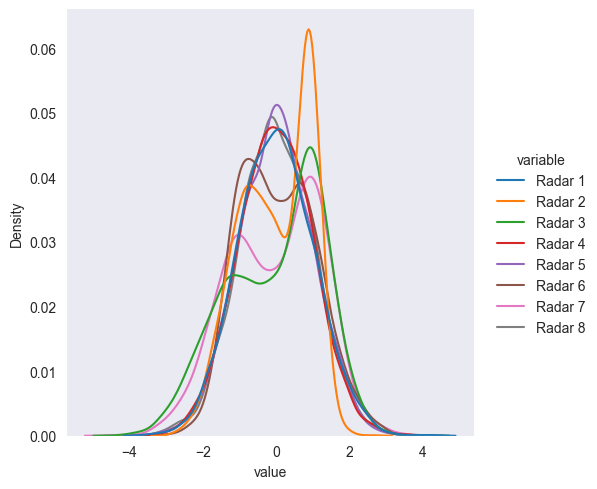

In [173]:
sns.displot(data=data.melt(id_vars=['Class']), hue='variable', x='value', kind='kde')

<Axes: >

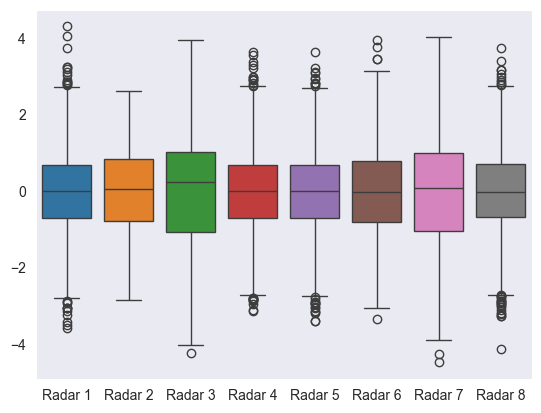

In [199]:
sns.boxplot(data=data.drop(['Class'], axis='columns'))

<Axes: xlabel='Class', ylabel='count'>

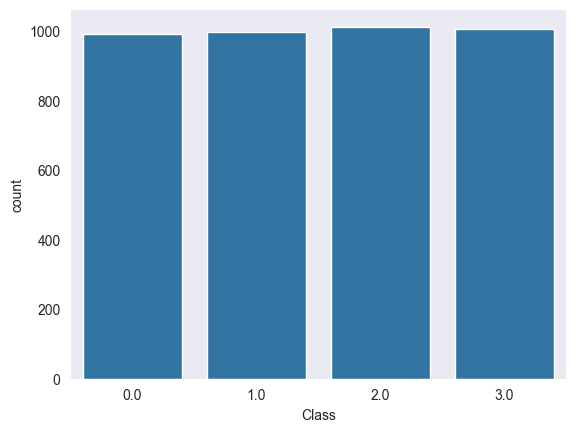

In [174]:
sns.countplot(data=data, x='Class')

**Wniosek:** Danych nie trzeba normalizować: dane pochodzą z 8 takich samych radarów, i mają wartości z podobnych przedziałów. Dane są dobrze zbalansowane.

# Zadanie 3

<Axes: >

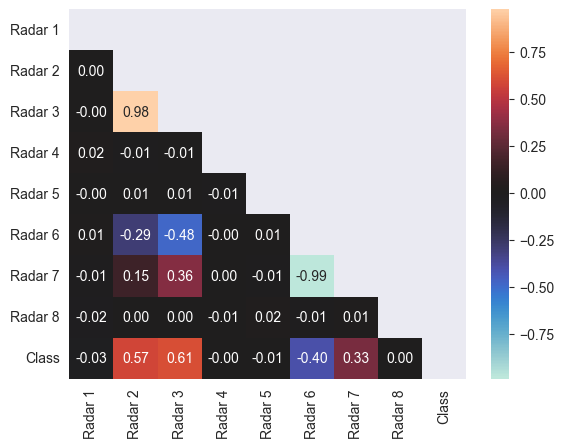

In [175]:
corr_matrix = np.corrcoef(data, rowvar=False)
sns.heatmap(corr_matrix, xticklabels=data.columns, yticklabels=data.columns, annot=True, center=0, fmt='.2f', mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))


Jak widać z powyższego wykresu jedynie cechy `Radar 2`, `Radar 3`, `Radar 6` i `Radar 7` mają jakąkolwiek korelację z `Class`.
Warto też zauważyć, że cecha `Radar 2` i `Radar 3` są bardzo silnie skorelowane (0.98) i podobnie cechy `Radar 6` i `Radar 7` (-0.99).
A zatem do dalszej klasyfikacji wybrałbym cechy `Radar 3` i `Radar 6`.

Number of features                              3
Features              [Radar 2, Radar 3, Radar 7]
Accuracy                                    0.884
Name: 2, dtype: object

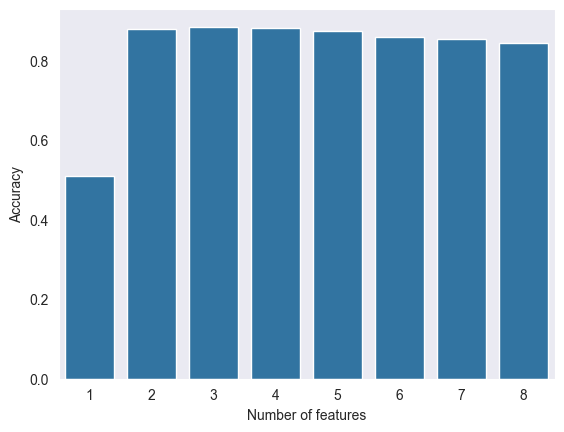

In [176]:
_data = []
for k in range(1, len(train.columns)):
    selector = SelectKBest(k=k).fit(X_train, y_train)
    features = selector.get_feature_names_out()
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(selector.transform(X_train), y_train)
    score = model.score(selector.transform(X_test), y_test)
    _data.append([k, features, score])
    
_data = pd.DataFrame(data=_data, columns=['Number of features', 'Features', 'Accuracy'])
sns.barplot(data=_data, x='Number of features', y='Accuracy')
_data.iloc[_data['Accuracy'].idxmax()]

**Wniosek:** Jak więc widać różnica pomiędzy dwoma, trzema i czterema cechami jest znikoma, a każda dodatkowa cecha negatywnie wpływa na złożoność obliczeń, dlatego pozostaję przy swoich wybranych cechach: `Radar 3`, `Radar 6`.

In [177]:
X_train = X_train[['Radar 3', 'Radar 6']]
X_test = X_test[['Radar 3', 'Radar 6']]

# Zadanie 4

Załóżmy jakąś rozsądną maksymalną liczbę sąsiadów: 30.

Number of neighbours    6.000
Accuracy                0.885
Name: 5, dtype: float64

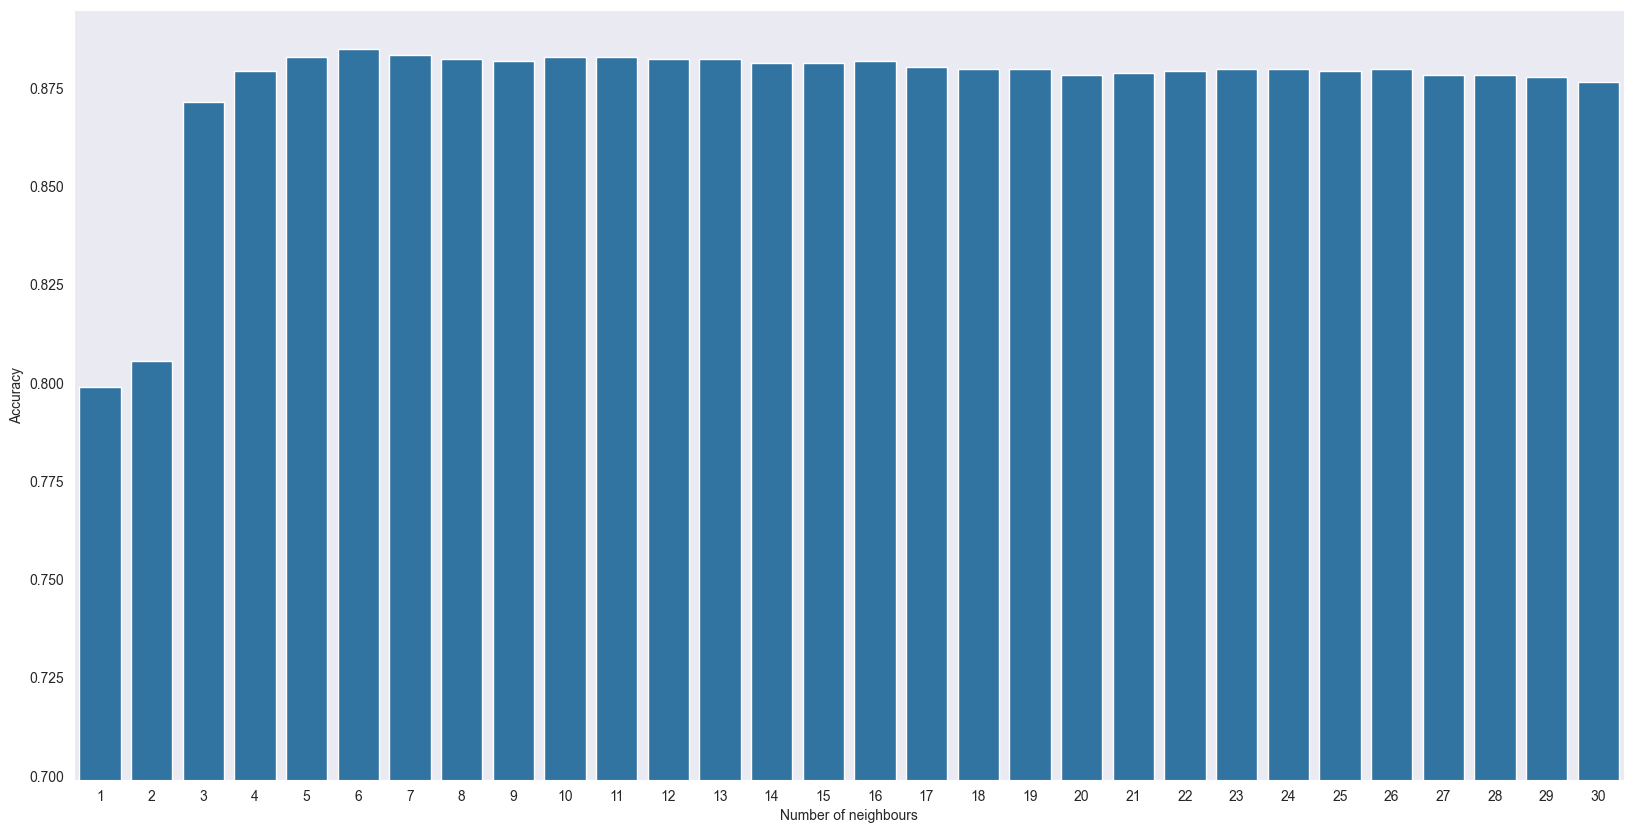

In [178]:
_data = []
for k in range(1, 30 + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    _data.append([k, score])

_data = pd.DataFrame(data=_data, columns=['Number of neighbours', 'Accuracy'])

_, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=_data, x='Number of neighbours', y='Accuracy', ax=ax)
ax.set(ylim=(_data['Accuracy'].min() - 0.1, _data['Accuracy'].max() + .01))
_data.iloc[_data['Accuracy'].idxmax()]

**Wniosek:** Optymalne `k`:

In [179]:
optimal_k = int(_data.iloc[_data['Accuracy'].idxmax()]['Number of neighbours'])
optimal_k

6

In [180]:
labels = [
    'człowiek',
    'pojazd pancerny',
    'lekki pojazd (np. samochod osobowy)',
    'autonomiczny robot bojowy'
]

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       510
         1.0       0.92      0.91      0.91       499
         2.0       0.89      0.89      0.89       476
         3.0       0.87      0.87      0.87       515

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.88      2000


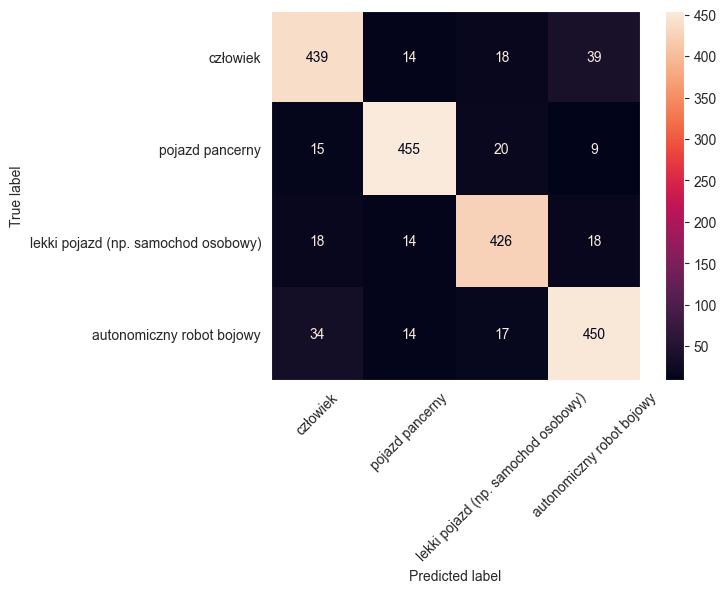

In [181]:
model = KNeighborsClassifier(n_neighbors=optimal_k).fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='rocket', display_labels=labels)
plt.xticks(rotation=45)
print(classification_report(y_test, model.predict(X_test)))

**Wnioski:** Model dobrze poradził sobie z rozpoznaniem większości obiektów, uzyskując porządne accuracy: 0.89. Najczęściej mylił autonomicznego robota bojowego z człowiekiem.